In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = pd.Series(boston.target)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'target']

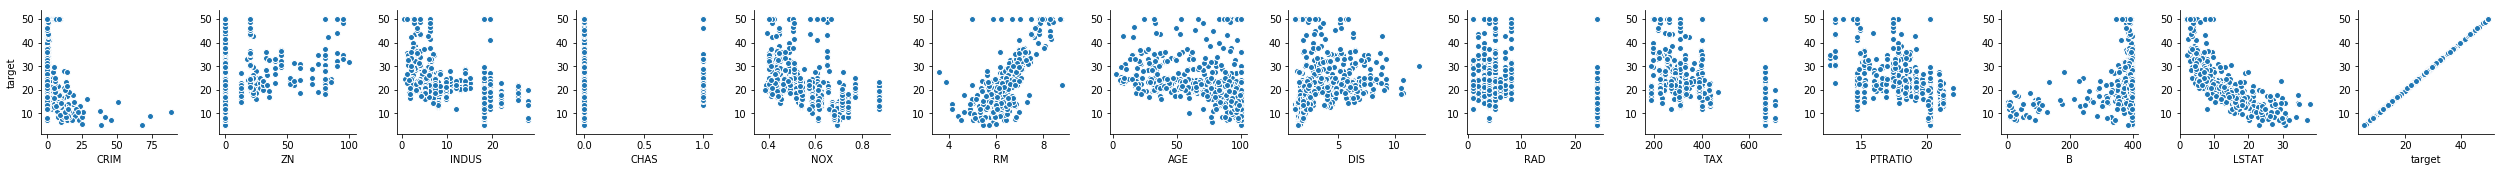

In [8]:
sns.pairplot(df, x_vars = df.columns.tolist(), y_vars = ['target'])

In [9]:
#check for missing values
for col in df:
    print (col, df[col].count())

CRIM 506
ZN 506
INDUS 506
CHAS 506
NOX 506
RM 506
AGE 506
DIS 506
RAD 506
TAX 506
PTRATIO 506
B 506
LSTAT 506
target 506


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
X_train.shape

(404, 13)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
regressor.score(X_train, y_train)

0.77742895278458135

In [16]:
regressor.score(X_test, y_test)

0.57711480570459739

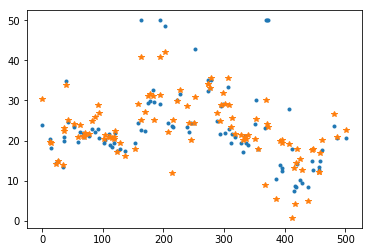

In [17]:
plt.plot(X_test.index, y_test,'.',
        X_test.index, y_pred,'*')

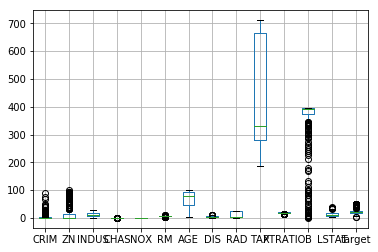

In [18]:
df.boxplot()

In [80]:
def rss(true, pred):
    return sum (( true - pred )**2)

In [81]:
def max_error(true, pred):
    m = 0;
    for i in true:
        if (abs (true[i] - pred[i]) > m):
            m = abs (true[i] - pred[i])
    return m

In [82]:
def max2(true, pred):
    return max(true - pred)

In [83]:
max2(y_test, y_pred)

26.595175867482766

In [84]:
rss(y_test, y_pred)

3732.3487796097065

# BACK ELIMINATION

In [24]:
#back elimination preparation
X_elim = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

In [25]:
import statsmodels.formula.api as sm

In [26]:
#iteration 1
X_opt = X_elim[:,:]
regressor_OLS = sm.OLS( endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          6.95e-135
Time:                        23:12:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
x1            -0.1072      0.033     -3.276      0.001      -0.171      -0.043
x2             0.0464      0.014      3.380      0.001       0.019       0.073
x3             0.0209      0.061      0.339      0.735      -0.100       0.142
x4             2.6886      0.862      3.120      0.002       0.996       4.381
x5           -17.7958      3.821     -4.658      0.000     -25.302     -10.289
x6             3.8048      0.418      9.102      0.000       2.983       4.626
x7             0.0008      0.013      0.057      0.955      -0.025       0.027
x8            -1.4758      0.199     -7.398      0.000      -1.868      -1.084
x9             0.3057      0.066      4.608      0.000       0.175       0.436
x10           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
x11           -0.9535      0.131     -7.287      0.000      -1.211      -0.696
x12            0.0094      0.003      3.500      0.001       0.004       0.015
x13           -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#iteration 2
X_opt = X_elim[:,[0,1,2,3,4,5,6,8,9,10,11,12,13]]
regressor_OLS = sm.OLS( endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          6.28e-136
Time:                        23:12:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4666      5.081      7.177      0.000      26.483      46.450
x1            -0.1072      0.033     -3.279      0.001      -0.171      -0.043
x2             0.0463      0.014      3.401      0.001       0.020       0.073
x3             0.0209      0.061      0.340      0.734      -0.100       0.142
x4             2.6911      0.860      3.130      0.002       1.002       4.380
x5           -17.7382      3.680     -4.820      0.000     -24.969     -10.508
x6             3.8097      0.409      9.325      0.000       3.007       4.612
x7            -1.4791      0.191     -7.758      0.000      -1.854      -1.104
x8             0.3054      0.066      4.622      0.000       0.176       0.435
x9            -0.0123      0.004     -3.281      0.001      -0.020      -0.005
x10           -0.9529      0.130     -7.313      0.000      -1.209      -0.697
x11            0.0094      0.003      3.515      0.000       0.004       0.015
x12           -0.5245      0.048    -11.018      0.000      -0.618      -0.431
==============================================================================
Omnibus:                      178.356   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.541
Skew:                           1.523   Prob(JB):                    2.64e-171
Kurtosis:                       8.289   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#iteration 3
X_opt = X_elim[:,[0,1,2,4,5,6,8,9,10,11,12,13]]
regressor_OLS = sm.OLS( endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          5.74e-137
Time:                        23:12:49   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.000      26.411      46.328
x1            -0.1076      0.033     -3.296      0.001      -0.172      -0.043
x2             0.0458      0.014      3.387      0.001       0.019       0.072
x3             2.7212      0.854      3.185      0.002       1.043       4.400
x4           -17.3956      3.536     -4.920      0.000     -24.343     -10.448
x5             3.7966      0.406      9.343      0.000       2.998       4.595
x6            -1.4934      0.186     -8.039      0.000      -1.858      -1.128
x7             0.2991      0.063      4.719      0.000       0.175       0.424
x8            -0.0118      0.003     -3.488      0.001      -0.018      -0.005
x9            -0.9471      0.129     -7.337      0.000      -1.201      -0.693
x10            0.0094      0.003      3.508      0.000       0.004       0.015
x11           -0.5232      0.047    -11.037      0.000      -0.616      -0.430
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_opt, y, test_size = 0.2)
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)
y_pred2 = regressor2.predict(X_test2)
regressor2.score(X_test2, y_test2)

0.7368245105969804

# BACK ELIMINATION WITHOUT APPENDING CONSTANT TERM

In [29]:
#iteration 1
X_opt2 = X.iloc[:,:].values
regressor_OLS = sm.OLS( endog = y, exog = X_opt2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:12:51   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0916      0.034     -2.675      0.008      -0.159      -0.024
x2             0.0487      0.014      3.379      0.001       0.020       0.077
x3            -0.0038      0.064     -0.059      0.953      -0.130       0.123
x4             2.8564      0.904      3.160      0.002       1.080       4.633
x5            -2.8808      3.359     -0.858      0.392      -9.481       3.720
x6             5.9252      0.309     19.168      0.000       5.318       6.533
x7            -0.0072      0.014     -0.523      0.601      -0.034       0.020
x8            -0.9680      0.196     -4.947      0.000      -1.352      -0.584
x9             0.1704      0.067      2.554      0.011       0.039       0.302
x10           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
x11           -0.3924      0.110     -3.571      0.000      -0.608      -0.177
x12            0.0150      0.003      5.561      0.000       0.010       0.020
x13           -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#iteration 2
X_opt2 = X.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]].values
regressor_OLS = sm.OLS( endog = y, exog = X_opt2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     967.3
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:12:52   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3072.
Df Residuals:                     494   BIC:                             3122.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0916      0.034     -2.677      0.008      -0.159      -0.024
x2             0.0488      0.014      3.409      0.001       0.021       0.077
x3             2.8510      0.898      3.173      0.002       1.086       4.616
x4            -2.9357      3.223     -0.911      0.363      -9.268       3.396
x5             5.9286      0.303     19.544      0.000       5.333       6.525
x6            -0.0072      0.014     -0.524      0.601      -0.034       0.020
x7            -0.9652      0.189     -5.097      0.000      -1.337      -0.593
x8             0.1715      0.064      2.676      0.008       0.046       0.297
x9            -0.0095      0.004     -2.689      0.007      -0.016      -0.003
x10           -0.3932      0.109     -3.608      0.000      -0.607      -0.179
x11            0.0150      0.003      5.577      0.000       0.010       0.020
x12           -0.4172      0.051     -8.242      0.000      -0.517      -0.318
==============================================================================
Omnibus:                      204.088   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.221
Skew:                           1.610   Prob(JB):                    6.44e-299
Kurtosis:                      10.401   Cond. No.                     8.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#iteration 3
X_opt2 = X.iloc[:,[0,1,3,4,5,7,8,9,10,11,12]].values
regressor_OLS = sm.OLS( endog = y, exog = X_opt2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:12:52   Log-Likelihood:                -1524.0
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     495   BIC:                             3116.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0915      0.034     -2.679      0.008      -0.159      -0.024
x2             0.0497      0.014      3.504      0.001       0.022       0.078
x3             2.8276      0.897      3.154      0.002       1.066       4.589
x4            -3.4000      3.096     -1.098      0.273      -9.483       2.683
x5             5.8950      0.296     19.899      0.000       5.313       6.477
x6            -0.9297      0.177     -5.261      0.000      -1.277      -0.582
x7             0.1735      0.064      2.713      0.007       0.048       0.299
x8            -0.0095      0.004     -2.706      0.007      -0.016      -0.003
x9            -0.3952      0.109     -3.632      0.000      -0.609      -0.181
x10            0.0149      0.003      5.564      0.000       0.010       0.020
x11           -0.4260      0.048     -8.933      0.000      -0.520      -0.332
==============================================================================
Omnibus:                      200.438   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.661
Skew:                           1.585   Prob(JB):                    9.10e-286
Kurtosis:                      10.226   Cond. No.                     7.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#iteration 4
X_opt2 = X.iloc[:,[0,1,3,5,7,8,9,10,11,12]].values
regressor_OLS = sm.OLS( endog = y, exog = X_opt2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:12:53   Log-Likelihood:                -1524.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     496   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0898      0.034     -2.630      0.009      -0.157      -0.023
x2             0.0512      0.014      3.630      0.000       0.024       0.079
x3             2.7212      0.892      3.052      0.002       0.970       4.473
x4             5.7113      0.245     23.353      0.000       5.231       6.192
x5            -0.8664      0.167     -5.185      0.000      -1.195      -0.538
x6             0.1820      0.063      2.867      0.004       0.057       0.307
x7            -0.0109      0.003     -3.292      0.001      -0.017      -0.004
x8            -0.4004      0.109     -3.682      0.000      -0.614      -0.187
x9             0.0146      0.003      5.475      0.000       0.009       0.020
x10           -0.4499      0.042    -10.596      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.034   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.000
Skew:                           1.575   Prob(JB):                    6.07e-272
Kurtosis:                      10.022   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_opt2, y, test_size = 0.2)
regressor3 = LinearRegression()
regressor3.fit(X_train3, y_train3)
y_pred3 = regressor3.predict(X_test3)
regressor3.score(X_test3, y_test3)

0.76289980389104572

# BACK ELIMINATION LOOP

In [70]:
#Backward Elimination with p-values only:

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print (regressor_OLS.summary())
    return x

In [71]:
SL = 0.05
X_opt3 = X.iloc[:,:].values
X_Modeled = backwardElimination(X_opt3, SL)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:22:46   Log-Likelihood:                -1524.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     496   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0898      0.034     -2.630      0.0

In [72]:
X_Modeled.shape

(506, 10)

In [77]:
#Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination2(x, SL):
    numVars = len(x[0])
    temp = np.zeros((X.shape[0],6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x


In [78]:
SL = 0.05
X_opt4 = X.iloc[:,:].values
X_Modeled2 = backwardElimination2(X_opt4, SL)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:24:00   Log-Likelihood:                -1524.0
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     495   BIC:                             3116.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0915      0.034     -2.679      0.0

In [79]:
X_Modeled2.shape

(506, 11)